In [18]:
using AutoRisk
using PGFPlots

In [98]:
network_filepath = "../../data/networks/bootstrap/iter_49.weights"
# network_filepath = "../../data/networks/bootstrap_test/iter_0.weights"
network = Network(network_filepath)
input = network.means[:]
input = reshape(input, 1, length(input));

In [99]:
println(network.means[1:20])
println(network.means[21:40])

[45.6119,50.0,50.0,50.0,50.0,50.0,50.0,50.0,45.5845,26.199,45.5845,50.0,50.0,50.0,50.0,50.0,50.0,50.0,45.6119,26.3055]
[-0.0152697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0171719,-0.0126667,-0.0171719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0152697,-0.00866667]


In [100]:
function get_heat(x, y)
    temp = reshape(input[:], 1, length(input))
    temp[10] = x
    temp[40] = y
    targets = predict(network, temp)
    return targets[2]
end

get_heat (generic function with 1 method)

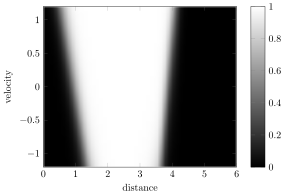

In [101]:
nbin = 50
Axis([Plots.Image(get_heat, (0,6), (-1.2,1.2), xbins = nbin, ybins = nbin)], xlabel="distance", ylabel="velocity")

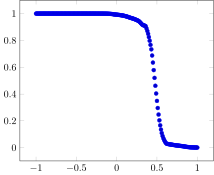

In [104]:
domain = -1.:.01:1.
vals = [get_heat(6, v) for v in domain]
Plots.Scatter(domain, vals)